In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# set our constants
r=0.75
K=10
h=0.75
s=0.04
# F as a func of t
def F_t(t,final_F,steps):
    return (final_F/steps)*t

# Ricker Model - Longer


We follow the following system:

$$ N_{t+1} = N_t \exp\left(r\left(1-\frac{N_t}{K}\right) + \sigma \varepsilon_t \right) - F\left(\frac{N_{t}^2}{N_{t}^2 + h^2} \right)$$
With $r=0.75,K=10,h=0.75,\sigma = 0.04, \varepsilon_t \sim N(0,1)$

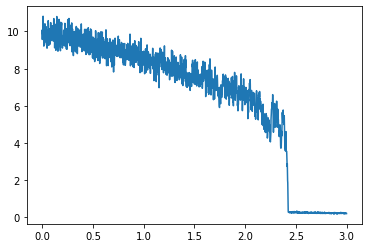

In [3]:
N_t = [10]
F_val = [0]
def RickerModel(N,steps,F):
    for t in range(steps):
        Pop = N[t]*np.exp(r*(1-(N[t]/K))+ s*np.random.normal()) 
        harvest =  (F(t,3,steps) * (N[t]*N[t]/(N[t]*N[t] + h*h))) 
        N.append(Pop-harvest) if (Pop-harvest > 0) else N.append(0)
        F_val.append(F(t,3,steps))
        
RickerModel(N_t,2000,F_t)

standardF_val = []
for i in F_val:
    standardF_val.append(i/200)


plt.plot(F_val,N_t)


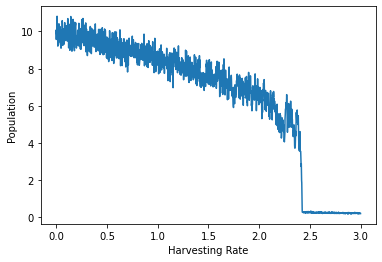

In [4]:
plt.plot(F_val,N_t)
plt.xlabel("Harvesting Rate")
plt.ylabel("Population")

plt.savefig("slides/RickLongerTS.png", dpi = 1200)

## Ugly Code for graphs :(

In [5]:
from itertools import combinations
import networkx as nx
def nat_visibility_graph(series):

    g = nx.Graph()
    
    # convert list of magnitudes into list of tuples that hold the index
    tseries = []
    n = 0
    for magnitude in series:
        tseries.append( (n, magnitude ) )
        n += 1

    # contiguous time points always have visibility
    for n in range(0,len(tseries)-1):
        (ta, ya) = tseries[n]
        (tb, yb) = tseries[n+1]
        g.add_node(ta, mag=ya)
        g.add_node(tb, mag=yb)
        g.add_edge(ta, tb)

    for a,b in combinations(tseries, 2):
        # two points, maybe connect
        (ta, ya) = a
        (tb, yb) = b

        connect = True
        
        # let's see all other points in the series
        for tc, yc in tseries[ta:tb]:
            # other points, not a or b
            if tc != ta and tc != tb:
                # does c obstruct?
                if yc > yb + (ya - yb) * ( (tb - tc) / (tb - ta) ):
                    connect = False
                    
        if connect:
            g.add_edge(ta, tb)
    return g

def hor_visibility_graph(series):

    g = nx.Graph()
    
    # convert list of magnitudes into list of tuples that hold the index
    tseries = []
    n = 0
    for magnitude in series:
        tseries.append( (n, magnitude ) )
        n += 1

    # contiguous time points always have visibility
    for n in range(0,len(tseries)-1):
        (ta, ya) = tseries[n]
        (tb, yb) = tseries[n+1]
        g.add_node(ta, mag=ya)
        g.add_node(tb, mag=yb)
        g.add_edge(ta, tb)

    for a,b in combinations(tseries, 2):
        # two points, maybe connect
        (ta, ya) = a
        (tb, yb) = b

        connect = True
        
        # let's see all other points in the series
        for tc, yc in tseries[ta:tb]:
            # other points, not a or b
            if tc != ta and tc != tb:
                # does c obstruct?
                if yc >= ya or yc >= yb:
                    connect = False
                    
        if connect:
            g.add_edge(ta, tb)
    return g

#helper fn

def plot_dict(d,title="",save = False, xaxis="",yaxis=""):
    lists = sorted(d.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    #plt.plot(x, y)
    plt.plot(F_val, y)
    plt.savefig(title, dpi = 1200) if save else True
    plt.show()

In [7]:
G = nat_visibility_graph(N_t)

KeyboardInterrupt: 

In [6]:

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig("slides/RickerLongerNatVis.png", dpi = 1200)
plt.show()

NameError: name 'G' is not defined

In [ ]:
H = hor_visibility_graph(N_t)


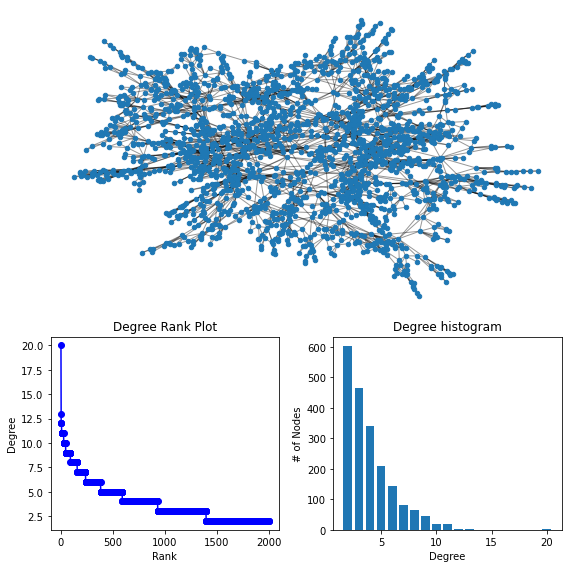

In [16]:
degree_sequence = sorted([d for n, d in H.degree()], reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Hcc = H.subgraph(sorted(nx.connected_components(H), key=len, reverse=True)[0])
pos = nx.spring_layout(Hcc, seed=10396953)
nx.draw_networkx_nodes(Hcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Hcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig("slides/RickerLongerHorVis.png", dpi =1200)
plt.show()

Measures on our graphs. Let our natural graph be G, and our Horizontal graph be H.


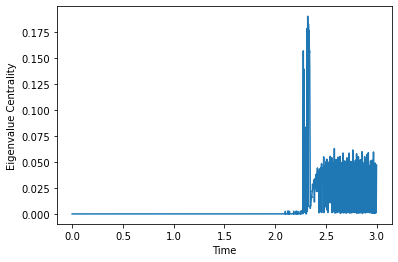

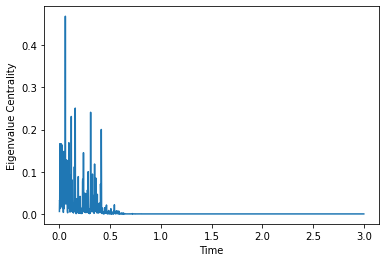

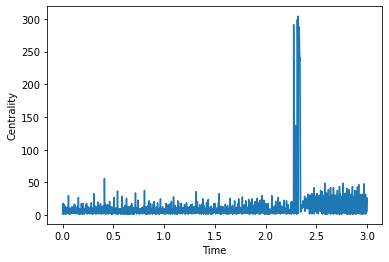

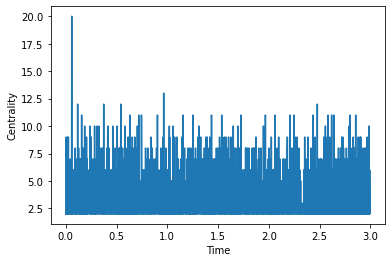

In [24]:
saveimg = False

Cent_G =  dict(G.degree(G.nodes()))
Cent_H =  dict(H.degree(H.nodes()))

AssortG = nx.degree_assortativity_coefficient(G)
AssortH = nx.degree_assortativity_coefficient(H)

ECG = nx.eigenvector_centrality_numpy(G, weight=None, max_iter=50, tol=0)
ECH = nx.eigenvector_centrality_numpy(H, weight=None, max_iter=50, tol=0)
plot_dict(dict(ECG),"slides/natVisEigenCentLonger.png",saveimg,"Time","Eigenvalue Centrality")
plot_dict(dict(ECH),"slideshorVisEigenCentLonger.png",saveimg,"Time","Eigenvalue Centrality")
plot_dict(Cent_G,"slides/natVisCentLonger.png",saveimg,"Time","Centrality")
plot_dict(Cent_H, "slides/horVisCentLonger.png",saveimg,"Time","Centrality")